In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os

In [2]:
model_lenet5 = keras.models.load_model("C:/Users/pc/Documents/pythonProjects/OPSI2023/pretrainedmodel/Xception dengan augmentasi dan hyperparameter/xceptionaugmented.h5")

In [3]:
IMAGE_SIZE = (100,100)
def valid_load_images():
    image = []
    label = []
    image_path = []
    VALID_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/valid" #ada sebanyak 3421 image
    for folder_name in os.listdir(VALID_FOLDER_PATH):
        for filename in os.listdir(os.path.join(VALID_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(VALID_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(VALID_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label

In [4]:
valid_image, valid_label = valid_load_images()

000108 (7)(1).png
000108 (7).png
000108 (8)(1).png
000108 (8).png
000109 (3)(1).png
000109 (3).png
000109 (4)(1).png
000109 (4).png
000109 (8)(1).png
000109 (8).png
000110 (7)(1).png
000110 (7).png
000111 (2)(1).png
000111 (2).png
000112 (2)(1).png
000112 (2).png
000112 (9)(1).png
000112 (9).png
000113 (3)(1).png
000113 (3).png
000113(1).png
000113.png
000114 (10)(1).png
000114 (10).png
000114(1).png
000114.png
000115 (2)(1).png
000115 (2).png
000115 (5)(1).png
000115 (5).png
000115 (9)(1).png
000115 (9).png
000115(1).png
000115.png
000116 (3)(1).png
000116 (3).png
000116 (5)(1).png
000116 (5).png
000116 (8)(1).png
000116 (8).png
000116 (9)(1).png
000116 (9).png
000117 (6)(1).png
000117 (6).png
000117(1).png
000117.png
Malignant case (541).jpg
Malignant case (542).jpg
Malignant case (543).jpg
Malignant case (544).jpg
Malignant case (545).jpg
Malignant case (546).jpg
Malignant case (547).jpg
Malignant case (548).jpg
Malignant case (549).jpg
Malignant case (550).jpg
Malignant case (551).

In [5]:
prediction_val_raw = model_lenet5.predict(valid_image)

7/7 [==============================] - 2s 236ms/step


In [6]:
jenis_kanker = ["Adenocarcinoma (Ganas)","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma (Ganas)", "Sel Kanker Skuamous (Ganas)"]
banyak_kesalahan = 0
for i in  range(len(prediction_val_raw)):
    if jenis_kanker[np.argmax(prediction_val_raw[i])] != valid_label[i]:
        banyak_kesalahan += 1
        print("DATA KE-", i)
        # print("Prediksi: " + jenis_kanker[np.argmax(prediction_val_raw[i])])
        # print("Kunci Jawaban :", valid_label[i])
        # print()
print(banyak_kesalahan)

DATA KE- 0
DATA KE- 1
DATA KE- 2
DATA KE- 3
DATA KE- 4
DATA KE- 5
DATA KE- 6
DATA KE- 7
DATA KE- 8
DATA KE- 9
DATA KE- 10
DATA KE- 11
DATA KE- 16
DATA KE- 17
DATA KE- 18
DATA KE- 19
DATA KE- 20
DATA KE- 21
DATA KE- 24
DATA KE- 25
DATA KE- 26
DATA KE- 27
DATA KE- 28
DATA KE- 29
DATA KE- 30
DATA KE- 31
DATA KE- 32
DATA KE- 33
DATA KE- 34
DATA KE- 35
DATA KE- 36
DATA KE- 37
DATA KE- 38
DATA KE- 39
DATA KE- 40
DATA KE- 41
DATA KE- 42
DATA KE- 43
DATA KE- 44
DATA KE- 45
DATA KE- 48
DATA KE- 49
DATA KE- 50
DATA KE- 51
DATA KE- 52
DATA KE- 53
DATA KE- 54
DATA KE- 55
DATA KE- 56
DATA KE- 57
DATA KE- 58
DATA KE- 59
DATA KE- 60
DATA KE- 61
DATA KE- 62
DATA KE- 63
DATA KE- 64
DATA KE- 65
DATA KE- 66
DATA KE- 69
DATA KE- 70
DATA KE- 71
DATA KE- 73
DATA KE- 74
DATA KE- 78
DATA KE- 79
DATA KE- 96
DATA KE- 97
DATA KE- 98
DATA KE- 99
DATA KE- 109
DATA KE- 110
DATA KE- 111
DATA KE- 112
DATA KE- 113
DATA KE- 117
DATA KE- 118
DATA KE- 119
DATA KE- 120
DATA KE- 121
DATA KE- 144
DATA KE- 145
DATA KE- 146
D

In [7]:
print("Akurasi pada sesi validasi adalah " + str((len(valid_image) - banyak_kesalahan) / len(valid_image)))

Akurasi pada sesi validasi adalah 0.5700934579439252


In [8]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
valid_label_index = np.reshape(valid_label,(-1,1))
valid_label_index = label_encoder.fit_transform(valid_label_index).toarray()
np.argmax(valid_label_index[50])

1

In [9]:
prediction_val_index = []
valid_label_indexs = []
for i in range (len(prediction_val_raw)):
    prediction_val_index.append(np.argmax(prediction_val_raw[i]))

for j in range(len(valid_label_index)):
    valid_label_indexs.append(np.argmax(valid_label_index[j]))

In [10]:
from sklearn.metrics import classification_report
print(classification_report(valid_label_indexs,prediction_val_index))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23        46
           1       0.40      0.10      0.15        21
           2       0.12      0.44      0.19         9
           3       0.96      0.76      0.85        66
           4       0.67      0.76      0.71        42
           5       0.40      0.93      0.56        30

    accuracy                           0.57       214
   macro avg       0.59      0.52      0.45       214
weighted avg       0.74      0.57      0.55       214



In [11]:
print(len(prediction_val_index))
len(valid_label_indexs)

214


214

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_label_indexs,prediction_val_index)
print(cm)

[[ 6  0  0  0 10 30]
 [ 0  2 19  0  0  0]
 [ 0  3  4  2  0  0]
 [ 0  0 10 50  4  2]
 [ 0  0  0  0 32 10]
 [ 0  0  0  0  2 28]]


Text(208.22222222222223, 0.5, 'Aktual')

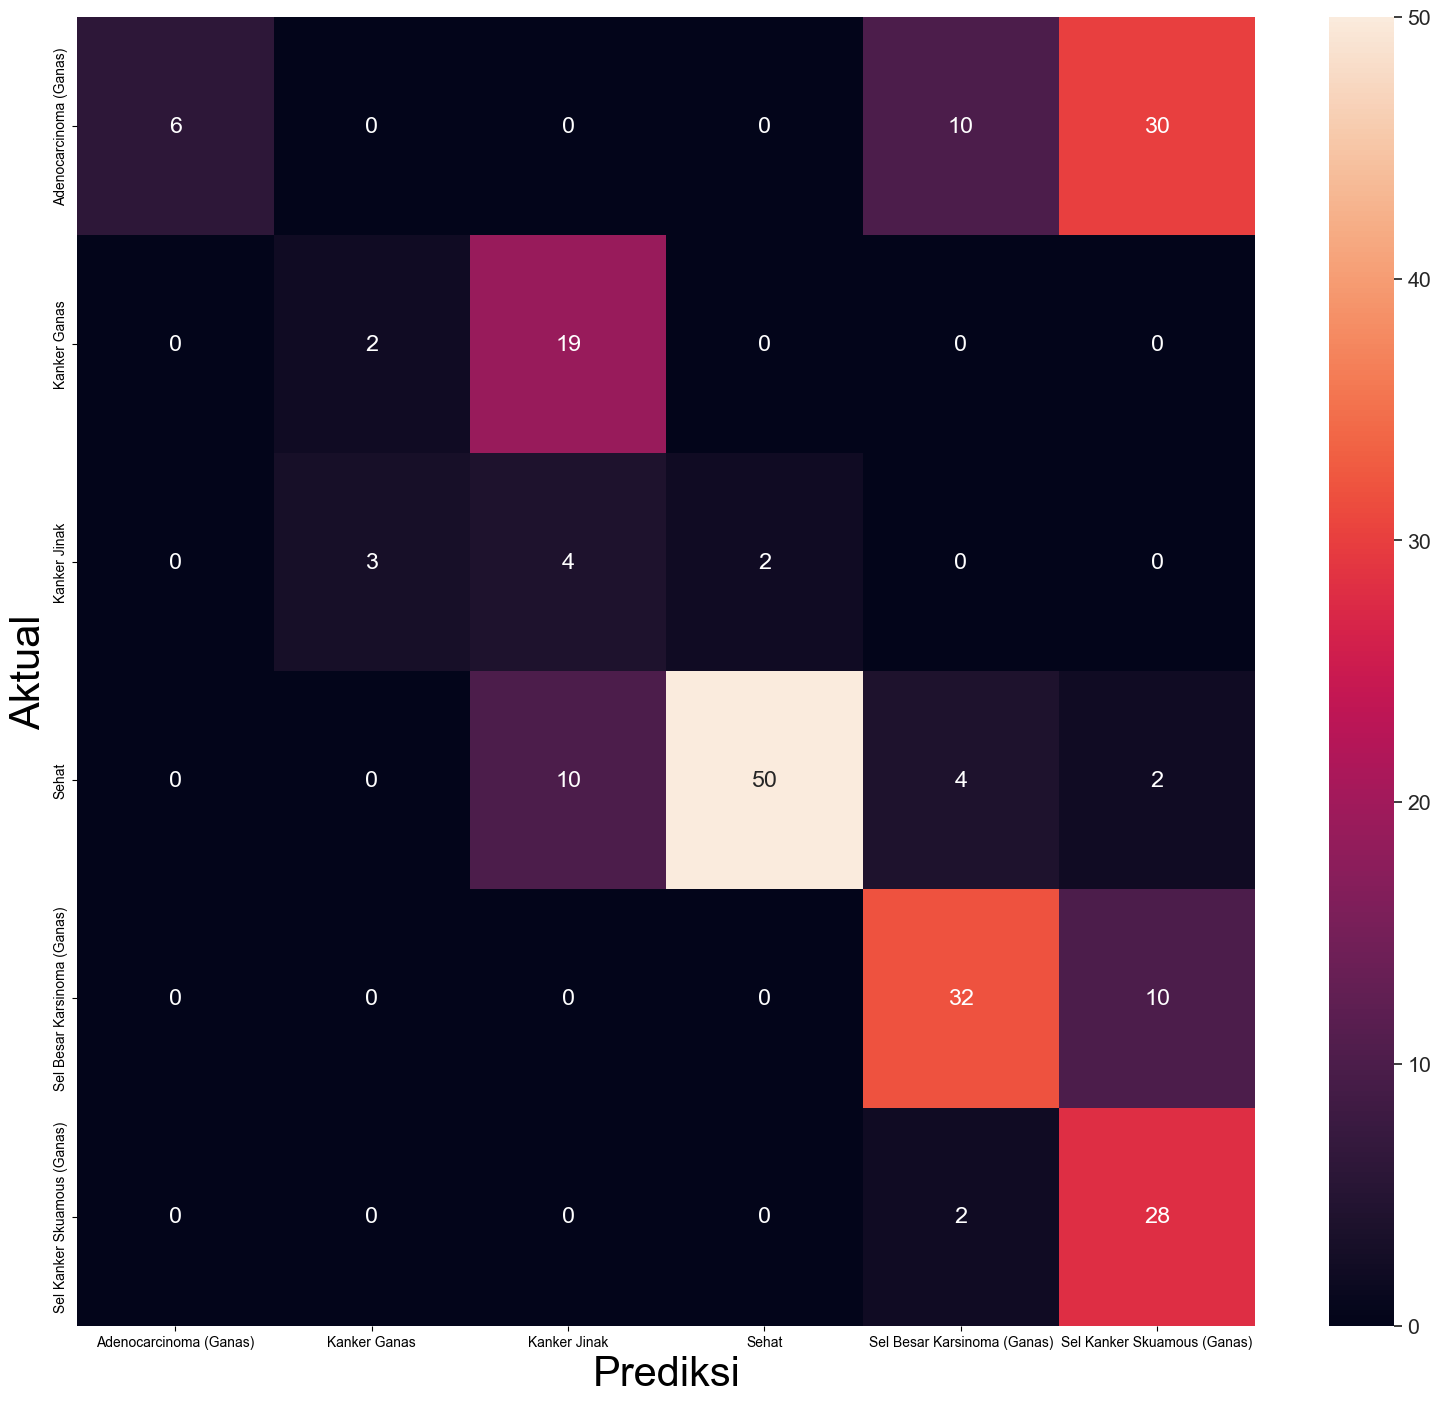

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19,17))
ax = plt.gca()

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True) # font size

ax.xaxis.set_ticklabels(jenis_kanker,size=10) 
ax.yaxis.set_ticklabels(jenis_kanker,size=10)

ax.set_xlabel('Prediksi',fontsize=30)
ax.set_ylabel('Aktual',fontsize=30) 


In [14]:
from sklearn.metrics import classification_report
print(classification_report(valid_label_indexs,prediction_val_index))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23        46
           1       0.40      0.10      0.15        21
           2       0.12      0.44      0.19         9
           3       0.96      0.76      0.85        66
           4       0.67      0.76      0.71        42
           5       0.40      0.93      0.56        30

    accuracy                           0.57       214
   macro avg       0.59      0.52      0.45       214
weighted avg       0.74      0.57      0.55       214

